In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn.datasets as datasets

In [19]:
url = "http://bit.ly/w-data"
dataset= pd.read_csv(url)
print("Successfully imported data into console" ) 

Successfully imported data into console


In [22]:
print(dataset.head(6))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20


In [38]:
dataset.shape

(25, 2)

In [39]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [42]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


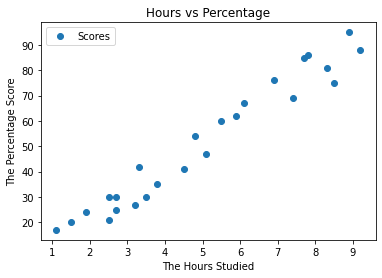

In [24]:
dataset.plot(x='Hours', y='Scores', style='o')    
plt.title('Hours vs Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show() 

In [25]:
X = dataset.iloc[:, :-1].values    
y = dataset.iloc[:, 1].values  

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [45]:
print(X_train)

[[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [46]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [49]:
print(y_train)

[76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [48]:
print(y_test)

[20 27 69 30 62 35 24 86]


In [50]:
from sklearn.linear_model import LinearRegression    
regressor = LinearRegression()    
regressor.fit(X_train, y_train)   
  
print("Training ... Completed !.")  

Training ... Completed !.


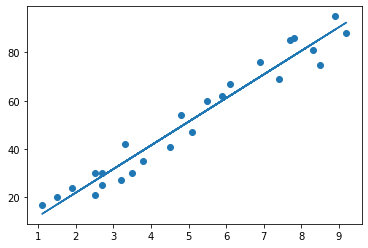

In [51]:
line = regressor.coef_*X+regressor.intercept_  
plt.scatter(X, y)  
plt.plot(X, line);  
plt.show()  

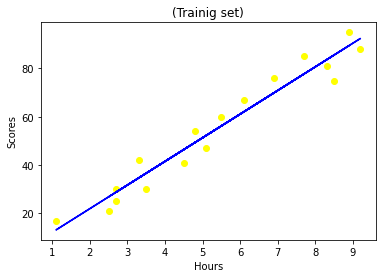

In [58]:
# PLotting the training set
plt.scatter(X_train,y_train, color='yellow')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

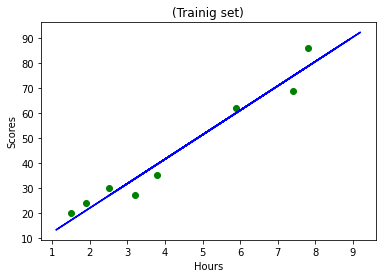

In [60]:
# PLotting the test set
plt.scatter(X_test,y_test, color='green')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [52]:
print(X_test)   
y_pred = regressor.predict(X_test)  

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [53]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df  

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [54]:
hours = [[9.25]]  
own_pred = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(own_pred[0]))  

Number of hours = [[9.25]]
Prediction Score = 92.91505723477056


In [55]:
print("Train : ",regressor.score(X_train,y_train)*100)
print("Test : ",regressor.score(X_test,y_test)*100)

Train :  94.84997422695115
Test :  95.68211104435257


In [56]:
from sklearn import metrics  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean absolute error:', metrics.mean_absolute_error(y_test, regressor.predict(X_test))) 
print('r^2 score error:',r2_score(y_test, regressor.predict(X_test)))
print('Mean squared error: ',mean_squared_error(y_test, regressor.predict(X_test)))

Mean absolute error: 4.419727808027651
r^2 score error: 0.9568211104435257
Mean squared error:  22.965097212700428
